<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import tensorflow.keras as kr

#from IPython.core.display import display, HTML

In [54]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos concéntricos de datos.
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=500, factor=0.1, noise=0.1)

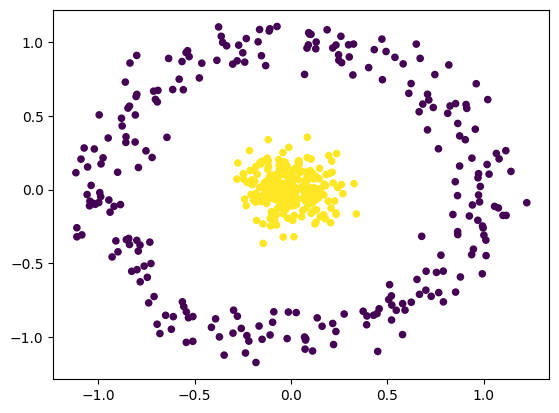

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20)

In [56]:
# número de neuronas por capa:
#2: corresponde al número de variables que ingresan a la red
#16: corresponde al número de neuronas de la primera capa oculta
#8: corresponde al número de neuronas de la segunda capa oculta
#1: corresponde a la salida de la red neuronal
nn = [2, 16, 8, 1]

In [57]:
# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

In [58]:
# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

In [59]:
# learning rate
lr = 0.05

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=lr), metrics=['acc'])

In [60]:
# Entrenamos al modelo.
#Notar en los valores que a partir de la época 40 el modelo llega a un 100% de accuracy tanto de entrenamiento como de validación
history = model.fit(X, Y, epochs=50, validation_split=0.3)

Epoch 1/50
11/11 [==============================] - 1s 21ms/step - loss: 0.2534 - acc: 0.5943 - val_loss: 0.2543 - val_acc: 0.5933
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2509 - acc: 0.6971 - val_loss: 0.2518 - val_acc: 0.6667
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2480 - acc: 0.7429 - val_loss: 0.2489 - val_acc: 0.6933
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2445 - acc: 0.7600 - val_loss: 0.2454 - val_acc: 0.6867
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2396 - acc: 0.7543 - val_loss: 0.2412 - val_acc: 0.6667
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2342 - acc: 0.7486 - val_loss: 0.2367 - val_acc: 0.6600
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2289 - acc: 0.7486 - val_loss: 0.2324 - val_acc: 0.6533
Epoch 8/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2241 - acc: 0.7

In [61]:
# Acceder a los valores de loss y val_loss (pérdida de entrenamiento y de validación)
loss = history.history['loss']
val_loss = history.history['val_loss']

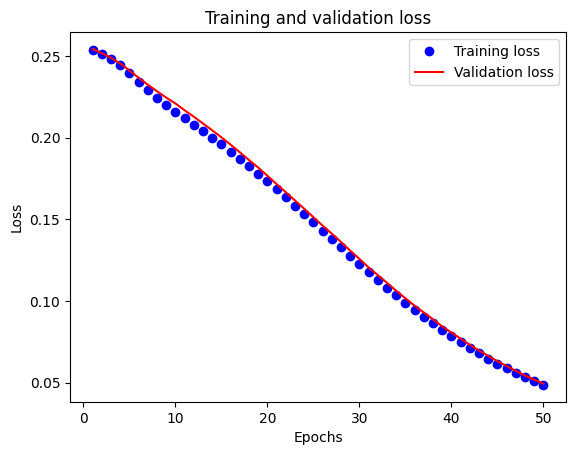

In [62]:
# Graficar la pérdida a lo largo de las épocas
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

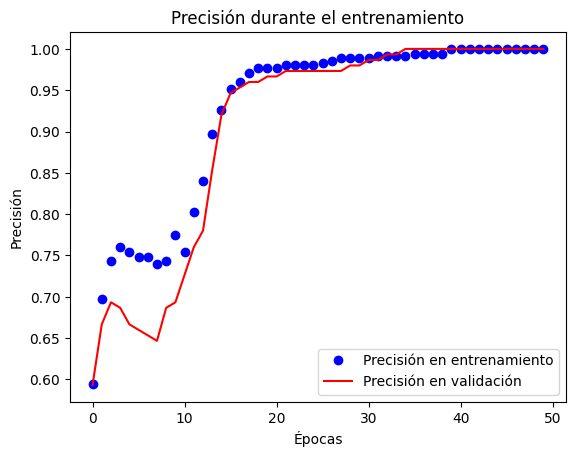

In [63]:
# Graficar la precisión (accuracy) a lo largo de las épocas

plt.plot(history.history['acc'], 'bo', label='Precisión en entrenamiento')
plt.plot(history.history['val_acc'], 'r', label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

In [64]:
# Obtener predicciones: valores harán relación a la probabilidad de pertener a una u otra clase (binaria)
predicciones = model.predict(X)
#Muestro primeros 5 valores (formato array)
predicciones[:5]

16/16 [==============================] - 0s 2ms/step


array([[0.23270318],
       [0.800936  ],
       [0.79875535],
       [0.1265413 ],
       [0.7602137 ]], dtype=float32)

In [65]:
# Obtener a qué clase pertenece cada predicción: utilizamos un umbral para los valores arrojados por la función sigmoide:
pred_class = (predicciones > 0.5).astype(int)
#Muestro primeros 5 valores (formato array)
pred_class[:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

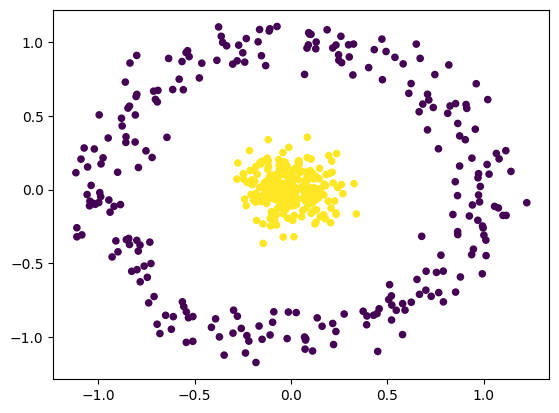

In [66]:
#Generamos misma gráfica que al inicio pero con la clase predicha por la red neuronal
plt.scatter(X[:, 0], X[:, 1], c=pred_class, s=20)